# Lecture 06 - Classification Trees

## Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
%pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.9 MB/s eta 0:00:00
Colab environment detected.


## Read Data

In [2]:
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

In [3]:
mower_df = pd.read_csv(my_drive_path + 'RidingMowers.csv')

X = mower_df.drop(columns=['Ownership'])
y = mower_df['Ownership']

## Create a Classifier

In [4]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=1)

# Fit the model on the training data
clf.fit(X,y)

DecisionTreeClassifier(max_depth=1, random_state=0)

Classes: Nonowner, Owner


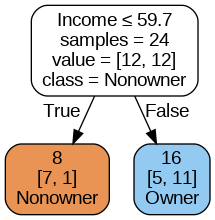

In [5]:
# Print the classes (target variable values) in the dataset
print("Classes: {}".format(', '.join(clf.classes_)))
# Visualize the decision tree classifier using the plotDecisionTree function
# Specify feature names for the plot and class names for the classes in the dataset
plotDecisionTree(clf, feature_names=mower_df.columns[:2], class_names=clf.classes_)

## Grow the full tree

Classes: Nonowner, Owner


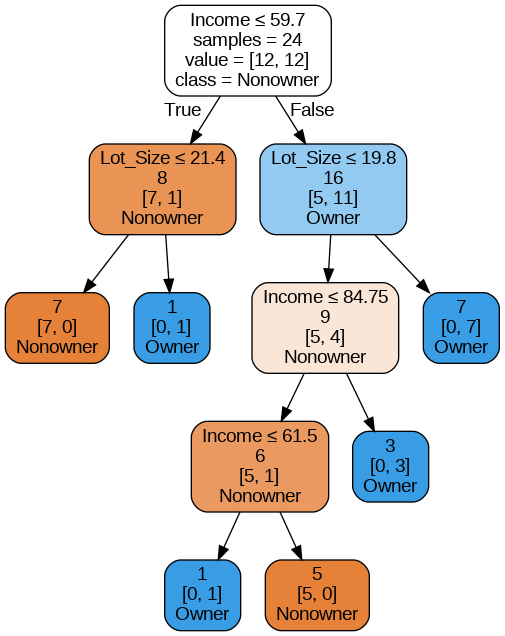

In [6]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(X, y)

print("Classes: {}".format(', '.join(classTree.classes_)))

#plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)
#or you can use
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Universal Bank Example

### Grow the full tree

In [7]:
bank_df = pd.read_csv(my_drive_path + 'UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

In [8]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

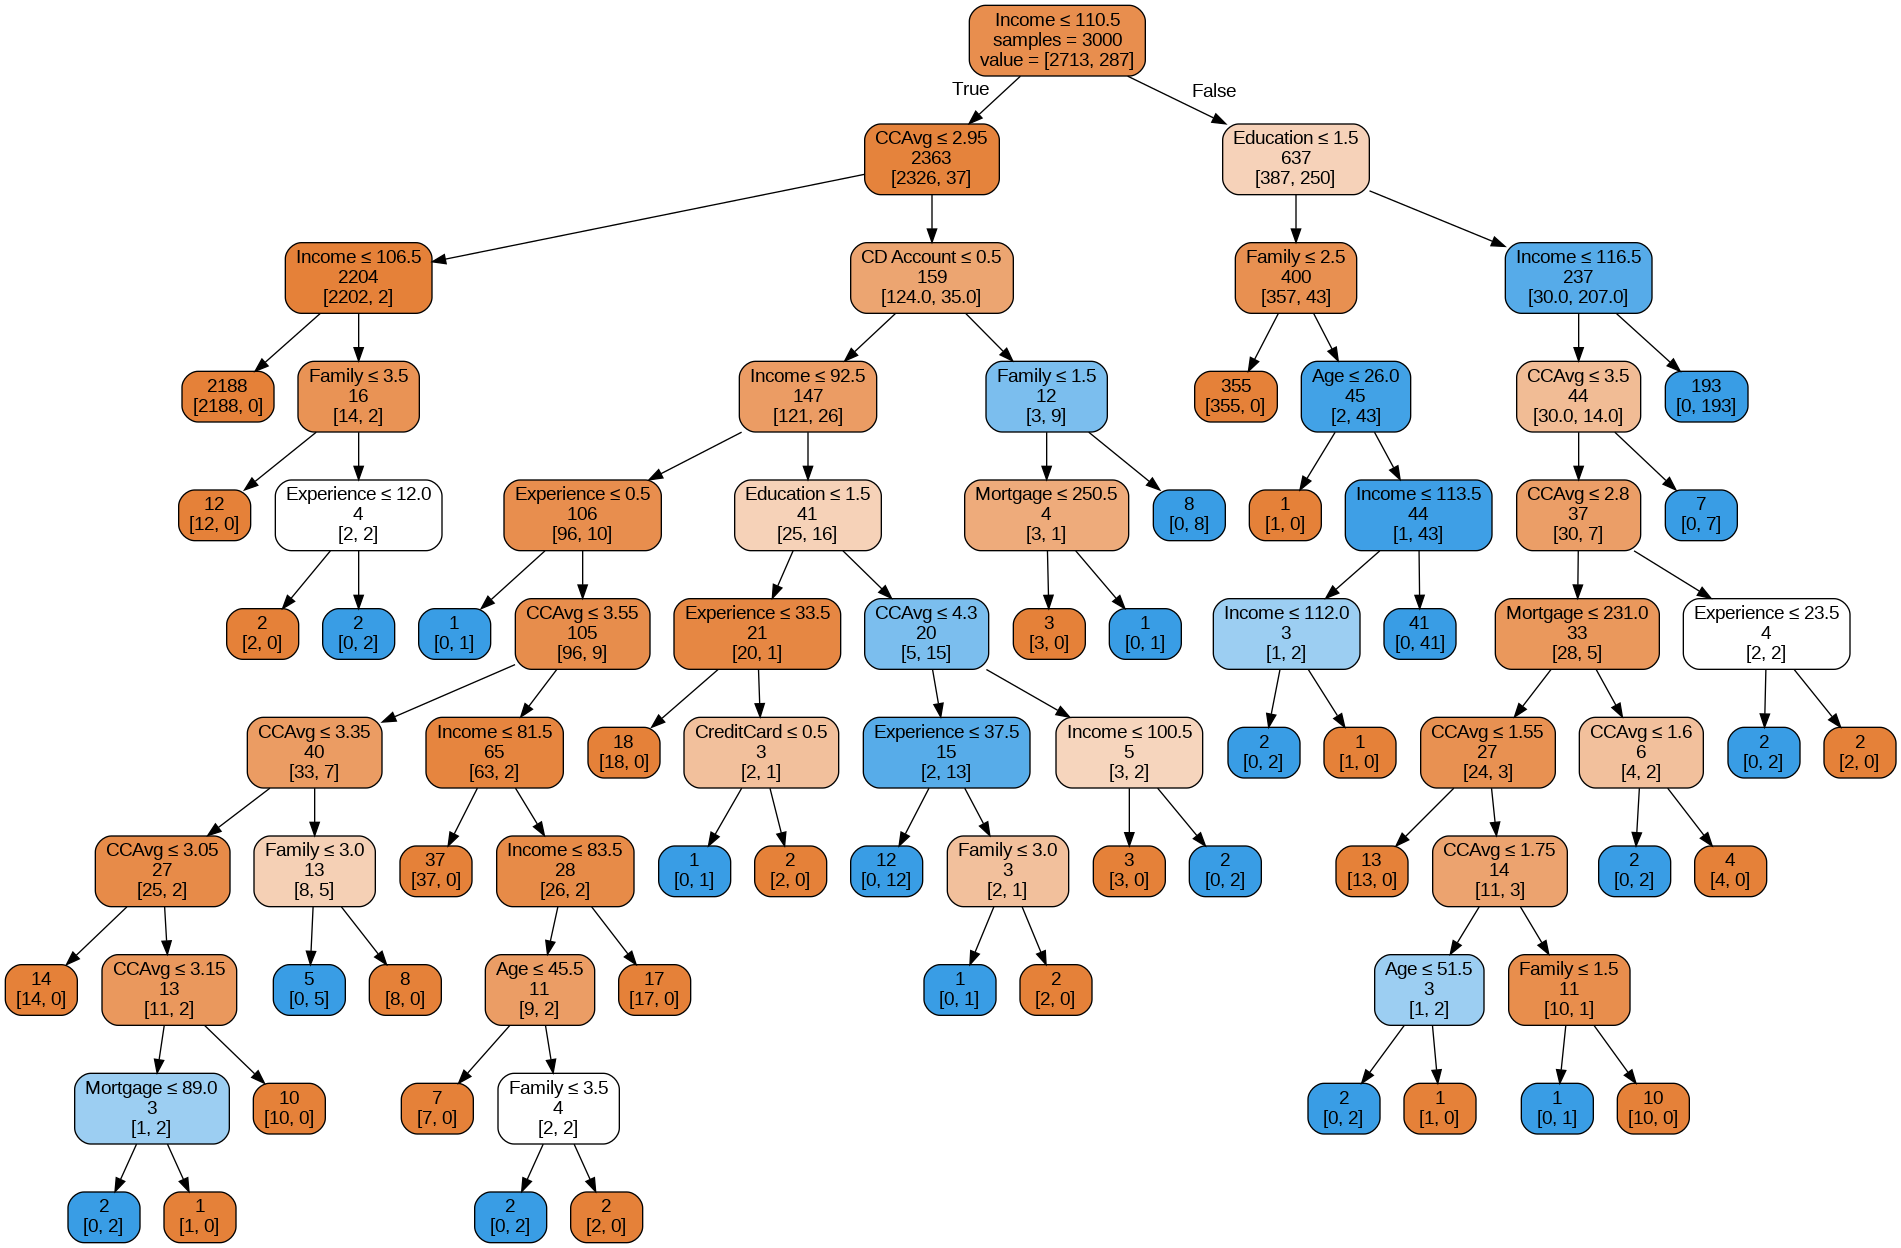

In [9]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

### Confusion Matrix - Full Tree


In [10]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9785)

       Prediction
Actual    0    1
     0 1789   18
     1   25  168


### Build a Smaller Tree -- Compare it with the full tree

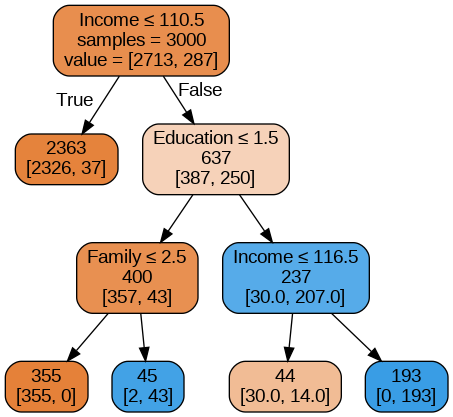

In [11]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [12]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


### Cross Validation Example

In [13]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.987', '0.973', '0.992', '0.987', '0.992']
Accuracy: 0.986 (+/- 0.013)
Accuracy: 0.986 (+/- 0.007)


### Grid Search Example

In [14]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}


gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [15]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(25, 34)),
    'min_samples_split': list(range(10, 22)),
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.9869999999999999
Improved parameters:  {'max_depth': 25, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [16]:
bestClassTree = gridSearch.best_estimator_
bestClassTree

DecisionTreeClassifier(max_depth=25, min_impurity_decrease=0.0011,
                       min_samples_split=13)

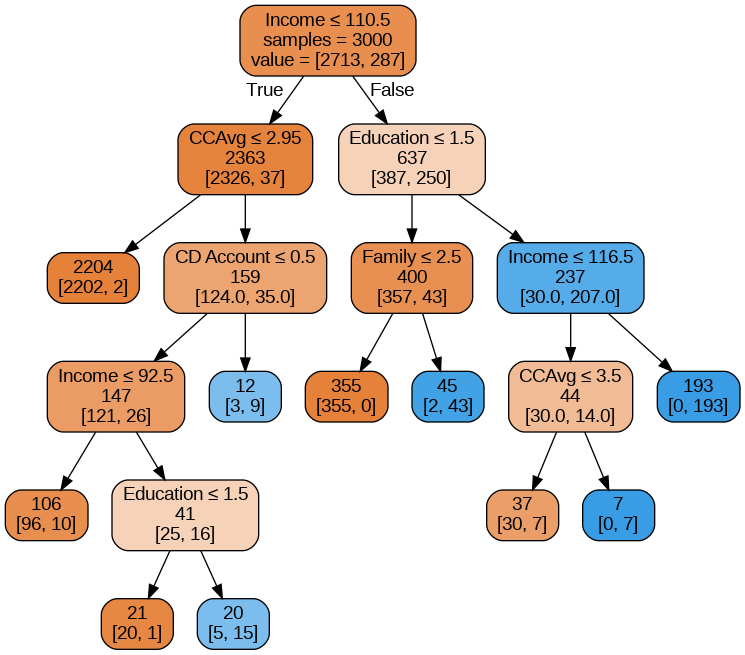

In [17]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [18]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0 2703   10
     1   20  267
Confusion Matrix (Accuracy 0.9825)

       Prediction
Actual    0    1
     0 1793   14
     1   21  172


## Step By Step Example

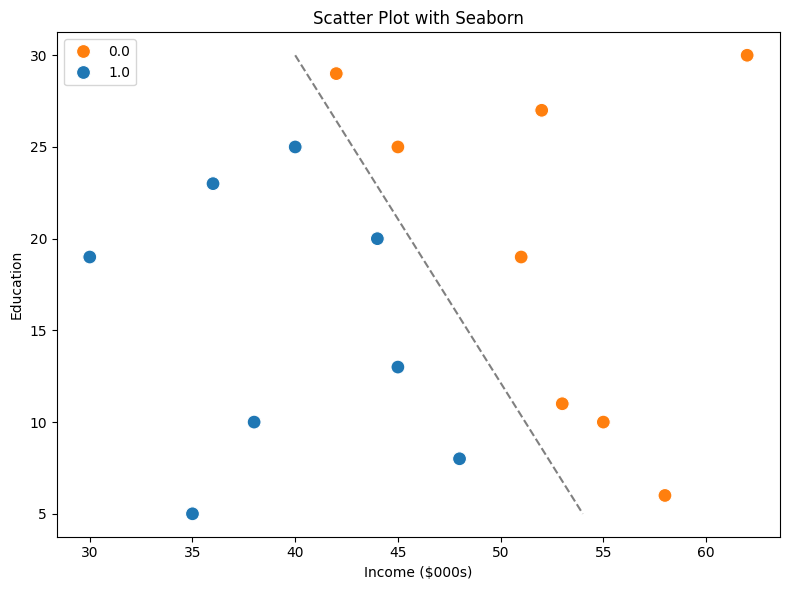

In [19]:


# Create the DataFrame
fakeScatter = pd.DataFrame([
    (30, 19, 1), (35, 5, 1), (40, 25, 1), (45, 13, 1),
    (38, 10, 1), (36, 23, 1), (48, 8, 1), (44, 20, 1), (50, 12),
    (51, 19, 0), (62, 30, 0), (42, 29, 0), (45, 25, 0),
    (55, 10, 0), (52, 27, 0), (58, 6, 0), (53, 11, 0),
], columns=['x', 'y', 'category'])

# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fakeScatter, x='x', y='y', hue='category', palette={0: 'C1', 1: 'C0'}, s=100)
sns.lineplot(x=[40, 54], y=[30, 5], color='grey', linestyle='--')

# Set labels and title
plt.xlabel('Income ($000s)')
plt.ylabel('Education')
plt.title('Scatter Plot with Seaborn')

# Display the plot
plt.tight_layout()
plt.show()


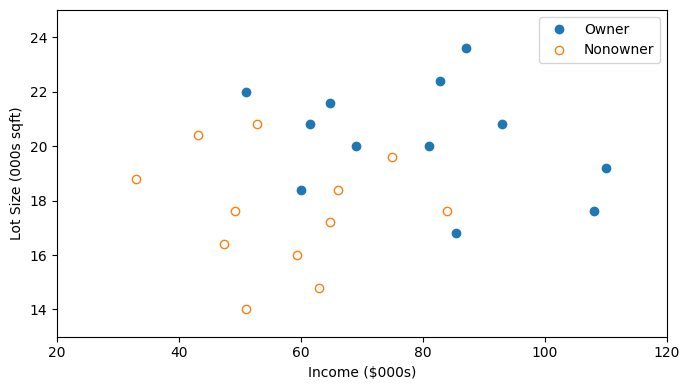

In [20]:
def basePlot(ax):
    mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o',
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

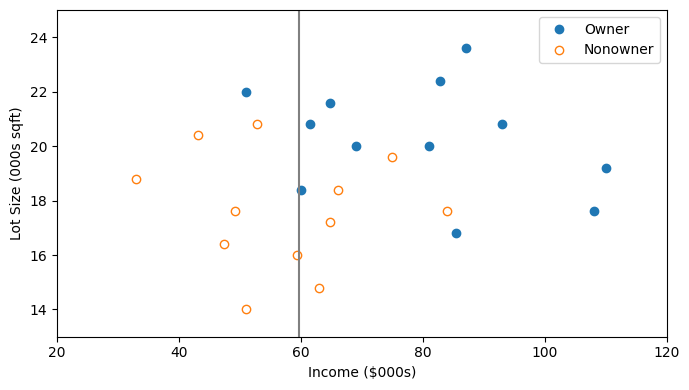

In [21]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

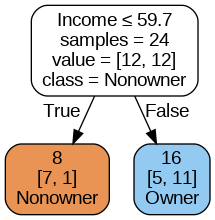

In [22]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

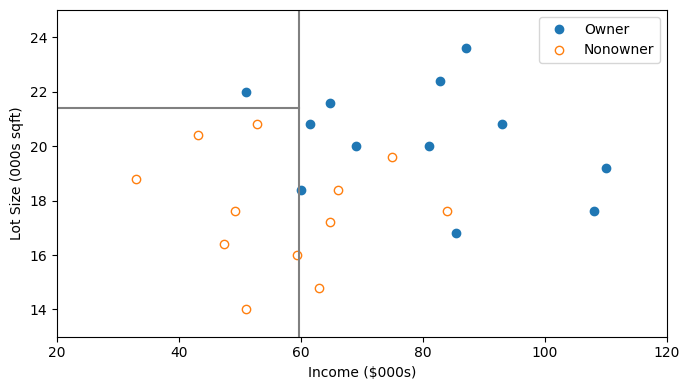

In [23]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

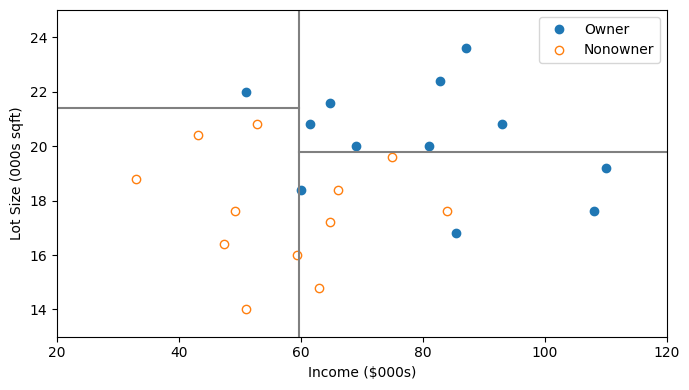

In [24]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
plt.tight_layout()
plt.show()

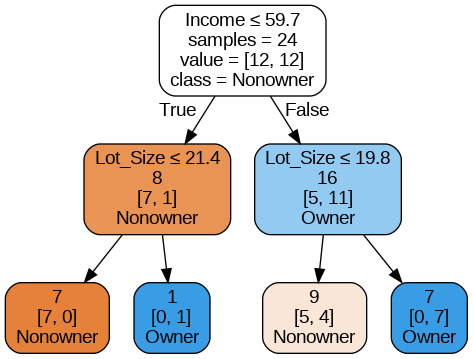

In [25]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

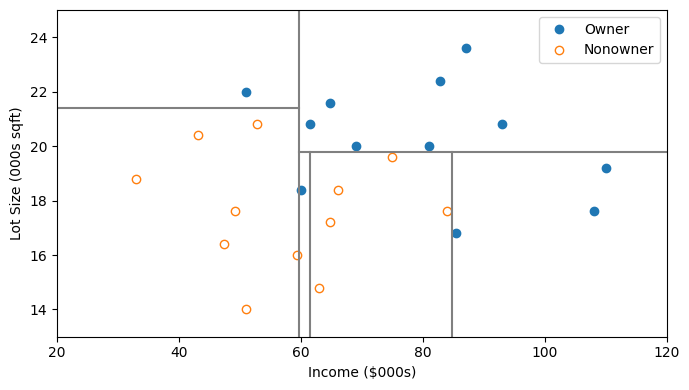

In [26]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

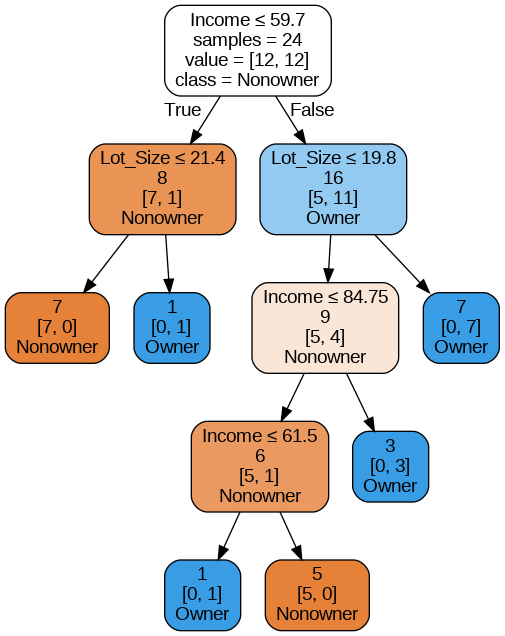

In [27]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Extracting Info From the Tree

In [28]:
tree = fullClassTree
print('Number of nodes', tree.tree_.node_count)

Number of nodes 85


In [29]:
estimator = tree
# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
value = estimator.tree_.value


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

from collections import Counter
nodeClassCounter = Counter()
terminal_leaves = 0
for i in range(n_nodes):
    if is_leaves[i]:
        terminal_leaves = terminal_leaves + 1
        nodeClassCounter.update([np.argmax(value[i][0])])
print()
print('Number of terminal leaves', terminal_leaves)
print(nodeClassCounter)


Number of terminal leaves 43
Counter({0: 24, 1: 19})


## Example

### Problem 9.2 Predicting Delayed Flights.

The file _FlightDelays.csv_ contains information on all commercial flights departing the Washington, DC area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival that is at least 15 minutes later than scheduled.

__Data Preprocessing.__ Transform variable day of week (DAY_WEEK) info a categorical variable. Bin the scheduled departure time into eight bins. Use these and all other columns as predictors (excluding DAY_OF_MONTH). Partition the data into training (60%) and validation (40%) sets.

In [30]:
# Load the data
delays_df = pd.read_csv(my_drive_path + 'FlightDelays.csv')
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [31]:
# convert variable DAY_WEEK to categorical data type
delays_df['DAY_WEEK'].astype('category')

,DAY_WEEK
0,4
1,4
2,4
3,4
4,4
...,...
2196,6
2197,6
2198,6
2199,6


In [32]:
# bin CRS_DEP_TIME variable into 8 bins
delays_df['binned_CRS_DEP_TIME'] = pd.cut(delays_df.CRS_DEP_TIME, 8, labels=False)
delays_df['binned_CRS_DEP_TIME'].astype('category')

,binned_CRS_DEP_TIME
0,4
1,5
2,3
3,5
4,2
...,...
2196,0
2197,5
2198,5
2199,3


In [33]:
# remove DAY_OF_MONTH variable
predictors_df = delays_df
columns = list(delays_df.columns)
columns.remove('DAY_OF_MONTH')
predictors_df = predictors_df[columns]

### __9.2.a.__

__9.2.a.__ Fit a classification tree to the flight delay variable using all the relevant predictors. Do not include DEP_TIME (actual departure time) in the model because it is unknown at the time of prediction (unless we are generating our predictions of delays after the plane takes off, which is unlikely). Use a tree with maximum depth 8 and minimum impurity decrease = 0.01. Express the resulting tree as a set of rules.

In [34]:
# select only those variables which can be used for predicting the outcome.
# create a new dataframe with predictors
columns = list(predictors_df.columns)
columns

columns.remove('CRS_DEP_TIME')
columns.remove('DEP_TIME')
columns.remove('FL_DATE')
columns.remove('FL_NUM')
columns.remove('TAIL_NUM')
columns.remove('Flight Status')
predictors_df = predictors_df[columns]
predictors_df.columns

predictors_df.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,binned_CRS_DEP_TIME
0,OH,JFK,184,BWI,0,4,4
1,DH,JFK,213,DCA,0,4,5
2,DH,LGA,229,IAD,0,4,3
3,DH,LGA,229,IAD,0,4,5
4,DH,LGA,229,IAD,0,4,2


In [35]:
# create dummies for categorical variables
predictors_df = pd.get_dummies(predictors_df, prefix_sep='_')
predictors_df.columns

Index(['DISTANCE', 'Weather', 'DAY_WEEK', 'binned_CRS_DEP_TIME', 'CARRIER_CO',
       'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU',
       'CARRIER_UA', 'CARRIER_US', 'DEST_EWR', 'DEST_JFK', 'DEST_LGA',
       'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD'],
      dtype='object')

In [36]:
# partition the data into training (60%) and validation (40%) sets. set random_state=1 for the reproducibility of results
X = predictors_df
y = delays_df['Flight Status']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_X.head()

,DISTANCE,Weather,DAY_WEEK,binned_CRS_DEP_TIME,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
1215,229,0,7,7,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1476,214,0,3,0,False,False,False,False,False,False,False,True,False,False,True,False,True,False
1897,214,0,2,1,False,False,False,False,False,False,False,True,False,False,True,False,True,False
83,214,0,5,3,False,False,False,False,False,False,False,True,False,False,True,False,True,False
1172,213,0,6,4,False,False,True,False,False,False,False,False,False,True,False,False,True,False


Tree has 3 nodes


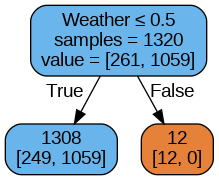

In [37]:
# fit the tree model and draw tree
smallClassTree = DecisionTreeClassifier(max_depth=8, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

print('Tree has {} nodes'.format(smallClassTree.tree_.node_count))
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

The limited tree has only one splitting variable: Weather

If (Weather <= 0.5) then classify as Ontime.

### __9.2.b.__

__9.2.b.__ If you needed to fly between DCA and EWR on a Monday at 7:00 AM, would you be able to use this tree? What other information would you need? Is it available in practice? What information is redundant?

__Answer:__

We cannot use this tree, because we must know the Weather. The redundant information is the day of week (Monday) and arrival airport (EWR). The tree requires knowing whether the weather was inclement or not. We may not know the weather in advance.

### __9.2.c.__

__9.2.c.__ Fit the same tree as in (a), this time excluding the Weather predictor. Display both the resulting (small) tree and the full-grown tree. You will find that the small tree contains a single terminal node.

In [38]:
# remove variable Weather from the analysis
predictors1_df = predictors_df
columns = list(predictors_df.columns)
columns
columns.remove('Weather')
predictors1_df = predictors1_df[columns]
predictors1_df.columns

Index(['DISTANCE', 'DAY_WEEK', 'binned_CRS_DEP_TIME', 'CARRIER_CO',
       'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU',
       'CARRIER_UA', 'CARRIER_US', 'DEST_EWR', 'DEST_JFK', 'DEST_LGA',
       'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD'],
      dtype='object')

In [39]:
X1 = predictors1_df
y1 = delays_df['Flight Status']

train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# full-grown tree
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X1, train_y1)

print('Tree has {} nodes'.format(fullClassTree.tree_.node_count))
plotDecisionTree(fullClassTree, feature_names=train_X1.columns)

Output hidden; open in https://colab.research.google.com to view.

Tree has 1 nodes


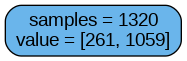

In [40]:
# small tree
ClassTree = DecisionTreeClassifier(max_depth=8, min_samples_split=50, min_impurity_decrease=0.01)
ClassTree.fit(train_X1, train_y1)

print('Tree has {} nodes'.format(ClassTree.tree_.node_count))
plotDecisionTree(ClassTree, feature_names=train_X1.columns)

__9.2.c.i.__ How is the small tree used for classification? (What is the rule for classifying?)

__Answer:__

In the small tree we get a single terminal node labeled "ontime." Therefore any new flight will be classified as being "on time".

__9.2.c.ii__ To what is this rule equivalent?

__Answer:__

This is equivalent to the naïve rule, which is the majority rule. In this dataset most of the flights arrived on time, and therefore the naïve rule is to classify a new flight as arriving on time.

__9.2.c.iii.__ Examine the full-grown tree. What are the top three predictors according to this tree?

CARRIER=US, CARRIER=DL, binned_CRS_DEP_TIME.

__9.2.c.iv.__ Why, technically, does the small tree result in a single node?

__Answer:__

The small tree results in a single node because adding splits would violate one of the constraints we used to limit tree growth.

__9.2.c.v.__ What is the disadvantage of using the top levels of the full-grown tree as opposed to the small tree?

__Answer:__

Simply using the top layers of the full decision tree would be an ad hoc visual approach, and does not assure an optimal solution. Using "gridsearchCV" in Python allows us to set the parameters for limiting tree growth by assessing error on the validation data. We did not use "gridsearchCV" in this case, opting to keep the problem simple by specifying the limiting parameters.

__9.2.c.vi.__ Compare this general result to that from logistic regression in the example in Chapter 10. What are possible reasons for the classification tree’s failure to find a good predictive model?

In [41]:
# predictive power of tree
# predicted values for validation set
pred_v = ClassTree.predict(valid_X1)
# confusion matrix for validation set
classificationSummary(valid_y1, pred_v)

Confusion Matrix (Accuracy 0.8104)

       Prediction
Actual   0   1
     0   0 167
     1   0 714


The logistic regression improves only marginally on the naive rule, and the simple tree we ended up with improves on it not at all, so it is likely that the predictor variables offer little predictive power. With poor predictive power and a relatively small dataset, the model-based logistic regression may do a bit better by virtue of imposing structure, as opposed to the tree, which is more at the mercy of the data and can suffer from instability.

## Overfitting Plot

Interpreting the Overfitting Curve:

    - We want to understand how different hyperparameters affect performance
    - Typically we will have the plot of accuracy and a hyperparameter value
    
Training Accuracy (Training Curve):

    - The training curve shows how well the model fits the training data as the hyperparameter value changes.
    - At the beginning, the training accuracy increases as the model's complexity (e.g., max_depth) increases. This is because  the model is capturing more details and patterns in the training data.
    - As the hyperparameter value continues to increase, the training accuracy approaches or reaches 100%. This is an indicator of potential overfitting because the model has become too complex and starts fitting noise in the data.

Validation Accuracy (Validation Curve):

    - The validation curve represents the model's performance on a separate validation dataset, which was not used during training.
    - Initially, the validation accuracy tends to increase as the hyperparameter value grows, as the model gets better at generalizing from the training data.
    - There comes a point where the validation accuracy plateaus or begins to decrease, even if the training accuracy continues to improve. This is a sign of overfitting.
    - The hyperparameter value at which the validation accuracy is the highest (the peak of the curve) often corresponds to the optimal model complexity.

Interpreting the curve may lead to the following insights:

 - Underfitting: If both training and validation accuracy are low and the curves are flat, the model is too simple and underfits the data. You may need to increase the model's complexity (e.g., increase max_depth or add more features).

- Optimal Model Complexity: The hyperparameter value at which the validation accuracy peaks represents the optimal model complexity, striking a balance between bias and variance. This is the value to choose for your final model.

- Overfitting: If the training accuracy continues to increase while the validation accuracy decreases or remains flat, the model is overfitting. The optimal model complexity is before this point, and you should select a hyperparameter value corresponding to the peak of the validation curve.

In summary, the overfitting curve helps you identify the optimal hyperparameter value that leads to the best model performance on unseen data, while avoiding overfitting. It guides the hyperparameter tuning process to build a model with good generalization capabilities.

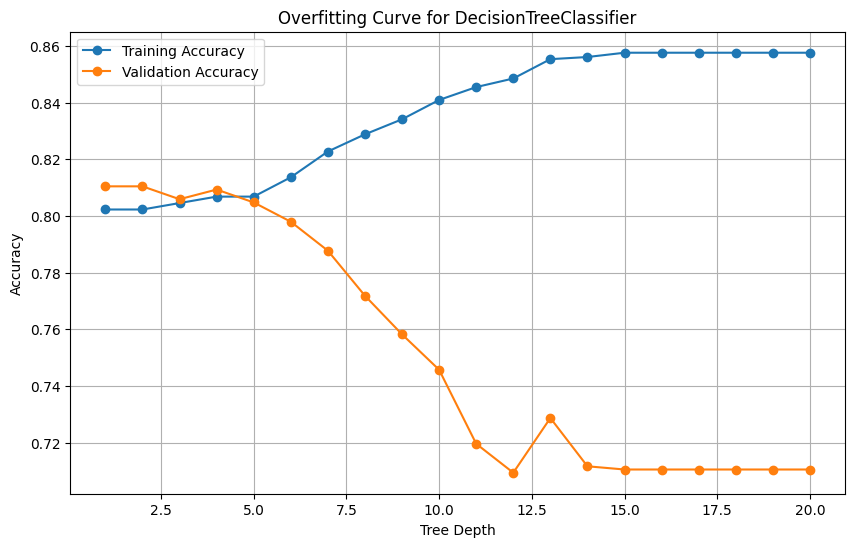

In [42]:
#Example of an overfitting curve


# Define a range of tree depths to explore
depth_range = range(1, 21)

# Initialize empty lists to store training and validation accuracy
train_accuracy = []
valid_accuracy = []

# Iterate through different tree depths and build and evaluate models
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(train_X1, train_y1)

    train_accuracy.append(clf.score(train_X1, train_y1))
    valid_accuracy.append(clf.score(valid_X1, valid_y1))

# Plot the overfitting curve
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracy, label="Training Accuracy", marker='o')
plt.plot(depth_range, valid_accuracy, label="Validation Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Curve for DecisionTreeClassifier")
plt.legend()
plt.grid(True)
plt.show()